## Logist regression

Linear regression : h = W X + b, y = {-inf, +inf}
Logistic regression : h = sigmoid(W X + b) , 0 < h < 1,  y = {0, 1}

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
np.set_printoptions(precision=3, suppress=True)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
sigmoid(-5), sigmoid(0), sigmoid(5), sigmoid(5000000)

(0.0066928509242848554, 0.5, 0.9933071490757153, 1.0)

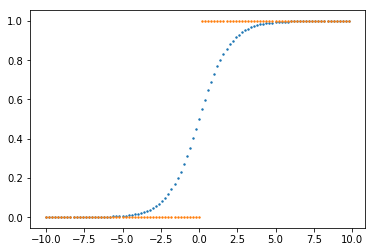

In [13]:
z = np.arange(-10, 10, 0.2)
h = sigmoid(z)
plt.scatter(z, h, s=2)
plt.scatter(z, np.round(h), s=2)

In [16]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [17]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((6, 2), (6, 1))

사이킷런의 Logistic Regression 으로 핏팅하세요
Logistic Regression = sigmoid(Linear Regression)

In [18]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(solver='lbfgs').fit(x_data,y_data[:,0])
model.score(x_data,y_data[:,0]) # accuracy 정확도

1.0

In [27]:
model.coef_, model.intercept_

(array([[1.087, 0.458]]), array([-4.88]))

In [33]:
# sigmoid(WX + b)
h = sigmoid(np.sum( model.coef_ * x_data, axis=1)+ model.intercept_) 
h

array([0.053, 0.209, 0.238, 0.699, 0.873, 0.928])

In [35]:
np.round(h)#판정내리기

array([0., 0., 0., 1., 1., 1.])

In [168]:
#필요한 연산을 준비
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
# X(6, 2)  W (?, ?) >  (6, 1)
W = tf.Variable(tf.random_normal(shape=[2, 1], seed=1))
b = tf.Variable(0.0)
h = tf.sigmoid(tf.matmul(X, W) + b)
#cost = tf.reduce_mean(tf.square(h - Y)) #MSE
cost = - tf.reduce_mean(  (Y * tf.log(h) + (1-Y) * tf.log(1-h)  )  )  #Cross Entropy 
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = [] 

In [ ]:
for i in range(1000):
    _, _cost = sess.run([train, cost], {X:x_data, Y:y_data})
    cost_list.append(_cost)
p = plt.plot(cost_list)

In [166]:
predict = sess.run(h, {X:x_data})
#predict > 0.5 # decision boundary 결정 경계
np.round(predict)

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score(y_data, np.round(predict)) 

0.8333333333333334

# 크로스 엔트로피 vs 평균 제곱 오차
- - ( y * log(h) + (1-y) * log(1-h) )
- y==1일때   +  y=-0 일때  

In [156]:
p = np.array([0.1, 0.3, 0.9])  #예측
y = np.array([1, 1, 1]) #정답

In [157]:
mse = (p-y)**2
mse

array([0.81, 0.49, 0.01])

In [161]:
#    - (y=1 일때 적용 + y=0 일때 적용 ) 
ce = - (y * np.log(p) + (1-y) * np.log(1-p)  )
ce

array([2.303, 1.204, 0.105])

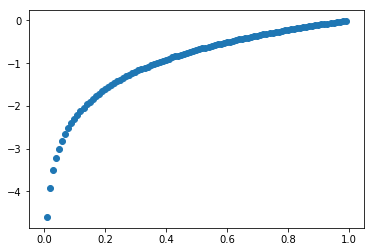

In [159]:
x_s = np.arange(0.01, 1, 0.01)
plt.scatter(x_s, np.log(x_s))
# 정답은 y = 0, 예측 = 1 , 오차 = log(1-오차)

당뇨병 환자 예측

In [173]:
path = 'C:/Users/User/Desktop/딥러닝 프레임워크/DeepLearningZeroToAll-master/DeepLearningZeroToAll-master/data-03-diabetes.csv'
data = np.loadtxt(path, delimiter=',')
data.shape

(759, 9)

In [177]:
x = data[:, :-1]
y = data[:, -1:]
x.shape, y.shape
p = plt.boxplot(x)

((759, 8), (759, 1))

In [180]:
#필요한 연산을 준비
X = tf.placeholder(tf.float32, [None, 8])
Y = tf.placeholder(tf.float32, [None, 1])
# X(n, 8)  W (?, ?) >  (n, 1)
W = tf.Variable(tf.random_normal(shape=[8, 1], seed=1))
b = tf.Variable(0.0)
h = tf.sigmoid(tf.matmul(X, W) + b)
#cost = tf.reduce_mean(tf.square(h - Y)) #MSE
cost = - tf.reduce_mean(  (Y * tf.log(h) + (1-Y) * tf.log(1-h)  )  )  #Cross Entropy 
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = [] 

In [183]:
from sklearn.metrics import accuracy_score
for i in range(1000):
    _, _cost = sess.run([train, cost], {X:x, Y:y})
    cost_list.append(_cost)
acc = accuracy_score(y, sess.run(h, {X:x}))
plt.title('accuracy ' + str(acc))
p = plt.plot(cost_list)

ValueError: Classification metrics can't handle a mix of binary and continuous targets